In [1]:
import time
start_time=time.time()

In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import lmfit
from scipy import interpolate
import pickle

from bfunc import bfunc00,bfunc01,bfunc02

Data load and region parameters

In [3]:
data = json.load(open("SFdata//604.json"))

pixscale = 0.26 # arcsec
pixscale *= 4.09                   # parsec
s0 = 4.09/2.355                    # parsec
m = 1.6

In [4]:
r = pixscale * 10**np.array(data["log10 r"])
rgrid = pixscale * np.logspace(0.0, 2)

B = np.array(data["Unweighted B(r)"])

sig2 = data["Unweighted sigma^2"]
r0 = np.interp(sig2, B, r)

54.62045699825188

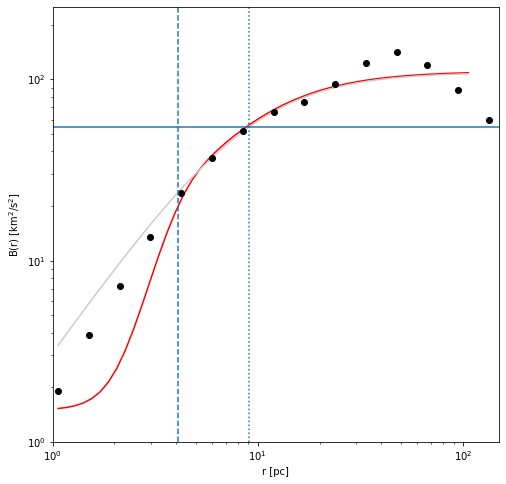

In [5]:
fig, ax = plt.subplots(figsize=(8, 8))
# Plot fit to unweighted strucfunc
ax.plot(rgrid, bfunc02(rgrid, r0, sig2, m, s0, 1.5), color="red")
ax.plot(rgrid, bfunc00(rgrid, r0, sig2, m), color="0.8")
# Plot points from unweighted strucfunc
ax.plot(r, B, 'o',  color='black')

ax.axhline(sig2)
ax.axvline(2.355 * s0, linestyle="dashed")
ax.axvline(r0, linestyle="dotted")

ax.set(
    xscale = "log",
    yscale = "log",
    ylim  = [1, 250],
    xlim  = [1, 150],
    xlabel = "r [pc]",
    ylabel = r"B(r) [km$^{2}$/s$^{2}$]",
)

sig2

In [6]:
model02 = lmfit.Model(bfunc02)
model02.param_names

['r0', 'sig2', 'm', 's0', 'noise']

In [7]:
relative_uncertainty = 0.125
weights = 1.0 / (relative_uncertainty * B)
weights[r > r0] /= 3.0

In [8]:
for p in model02.param_names:
    model02.set_param_hint(p, min=0.0)
#model02.set_param_hint("sig2", value=sig2, vary=False)
#model02.set_param_hint("s0", min=1.0)
model02.print_param_hints()

Name      Value      Min      Max     Vary    Expr    
m           nan        0      inf     True    
noise       nan        0      inf     True    
r0          nan        0      inf     True    
s0          nan        0      inf     True    
sig2        nan        0      inf     True    


In [9]:
result2 = model02.fit(
    B, 
    weights=weights,
    r=r, r0=r0, m=m, s0=s0, noise=1.0, sig2=sig2
)

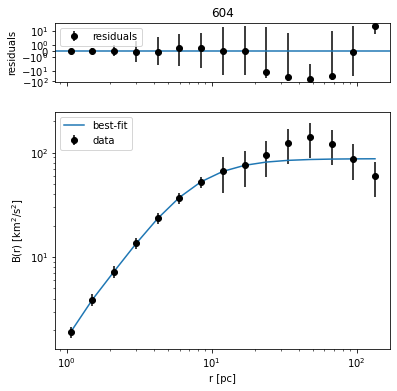

In [10]:
fig, _ = result2.plot( 'ko')
fig.axes[0].set(
    title='604',
    xscale="log",
    yscale="symlog",
)
fig.axes[1].set(
    xscale = "log",
    yscale = "log",
    xlabel = "r [pc]",
    ylabel = r"B(r) [km$^{2}$/s$^{2}$]",
);

plt.savefig('SFpaper//604.pdf', bbox_inches='tight')

In [11]:
print(result2.fit_report())

[[Model]]
    Model(bfunc02)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 56
    # data points      = 15
    # variables        = 5
    chi-square         = 4.05945179
    reduced chi-square = 0.40594518
    Akaike info crit   = -9.60503397
    Bayesian info crit = -6.06478296
[[Variables]]
    r0:     6.95938687 +/- 0.77230196 (11.10%) (init = 9.091583)
    sig2:   43.4601341 +/- 5.00050751 (11.51%) (init = 54.62046)
    m:      2.07570791 +/- 0.28998697 (13.97%) (init = 1.6)
    s0:     0.42782597 +/- 0.26471614 (61.87%) (init = 1.73673)
    noise:  0.46820398 +/- 1.61881038 (345.75%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(s0, noise)   =  0.974
    C(m, noise)    =  0.919
    C(r0, sig2)    =  0.916
    C(m, s0)       =  0.836
    C(r0, m)       = -0.707
    C(sig2, m)     = -0.695
    C(sig2, noise) = -0.541
    C(sig2, s0)    = -0.475
    C(r0, noise)   = -0.446
    C(r0, s0)      = -0.350


In [12]:
#for p in result2.model.param_names:
#    result2.params[p].stderr = result2.params[p].value * 0.1

In [13]:
result2.conf_interval()
print(result2.ci_report())

C:\Users\ZAINTEL2\anaconda3\lib\site-packages\lmfit\confidence.py:312: UserWarning: Bound reached with prob(s0=0.0) = 0.33196647910505955 < max(sigmas)
  warn(errmsg)
C:\Users\ZAINTEL2\anaconda3\lib\site-packages\lmfit\confidence.py:312: UserWarning: Bound reached with prob(noise=0.0) = 0.2634633787891781 < max(sigmas)
  warn(errmsg)


          99.73%    95.45%    68.27%    _BEST_    68.27%    95.45%    99.73%
 r0   :  -2.26001  -1.43991  -0.72009   6.95939  +0.83804  +1.88881  +3.59517
 sig2 : -15.51555  -9.71659  -4.88594  43.46013  +5.05452 +10.73572 +18.73420
 m    :  -0.45166  -0.29661  -0.17723   2.07571  +0.23101  +0.45281  +0.81907
 s0   :      -inf      -inf      -inf   0.42783  +0.27257  +0.42128  +0.64572
 noise:      -inf      -inf      -inf   0.46820  +1.11683  +1.45243  +1.81538


In [14]:
plt.style.use([
    "seaborn-poster",
])

In [15]:
plot_limits = {
    "s0": [0.0, 1.5],
    "m": [0.5, 3],
    "r0": [5.0, 16.0],
    "noise": [0.0, 4.0],
    "sig2": [35, 50],
}

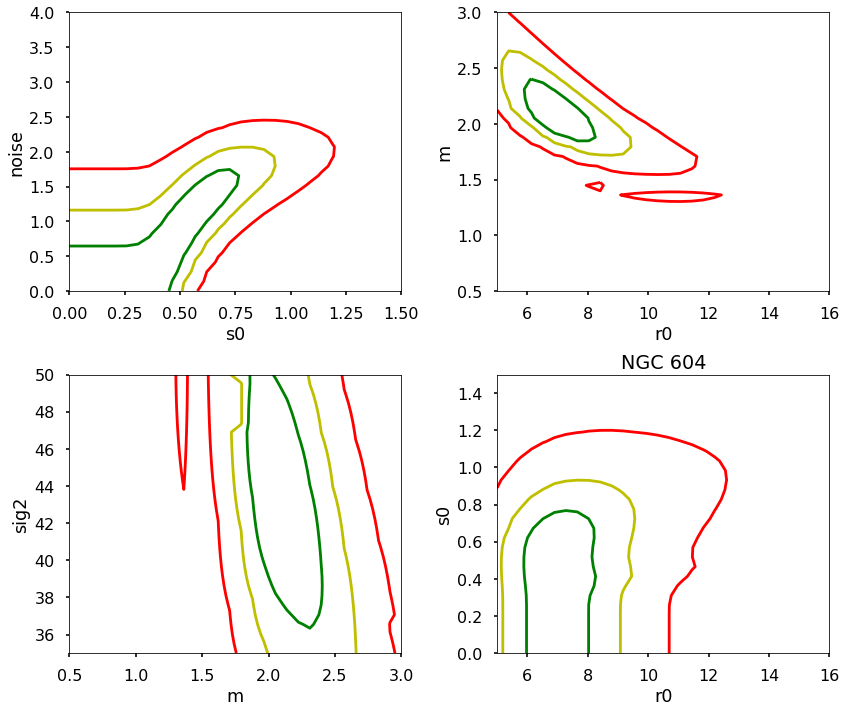

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

plt.title('NGC 604')
levels = [0.6827, 0.9545, 0.9973]
colors = ["g", "y", "r"]

for ax, [xvar, yvar] in zip(axes.flat, [
    ["s0", "noise"],
    ["r0", "m"],
    ["m", "sig2"],
    ["r0", "s0"],
]):
    cx, cy, grid = lmfit.conf_interval2d(
        result2, result2, xvar, yvar, 30, 30,
        limits=[plot_limits[xvar], plot_limits[yvar]],
    )
    ctp = ax.contour(cx, cy, grid, levels, colors=colors)
    ax.set_xlabel(xvar)
    ax.set_ylabel(yvar)

fig.tight_layout();

In [17]:
x=r
y=B-2*sig2
tck=interpolate.splrep(x,y,s=0)
grid=np.linspace(x.min(),x.max(),num=len(x))
ynew=interpolate.splev(grid,tck,der=0)
inter=pd.DataFrame([grid,ynew]).T
SFr=interpolate.sproot(tck)
SFr

array([28.73186143, 75.1600905 ])

In [18]:
r.max()/result2.params['r0'].value

19.236483149188793

In [19]:
(r[0]/2**0.5)*((result2.params['r0'].value/r[0])**(result2.params['m'].value/2))

5.283723135249478

In [20]:
#f = open('CI//604.pkl',"wb")
#pickle.dump(result2,f)
#f.close()

In [21]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 31.045426845550537 seconds ---
